In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [41]:
userlog_df = pd.read_parquet('D:/kkbox-churn-prediction-challenge/data/sample/sample_ratio_0.107/sample_user_logs.parquet/sample_user_logs (ratio=0.107).parquet')

In [42]:
userlog_df['date'] = pd.to_datetime(userlog_df['date'])

In [7]:
len(userlog_df)

29812117

In [21]:
cols = list(userlog_df.columns)[1:7]
cols

['date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100']

- 유저 로그 데이터 중 재생한 곡의 수는 특정 구간에 모여있지만 아웃라이어가 큰 경우도 발생

<AxesSubplot: >

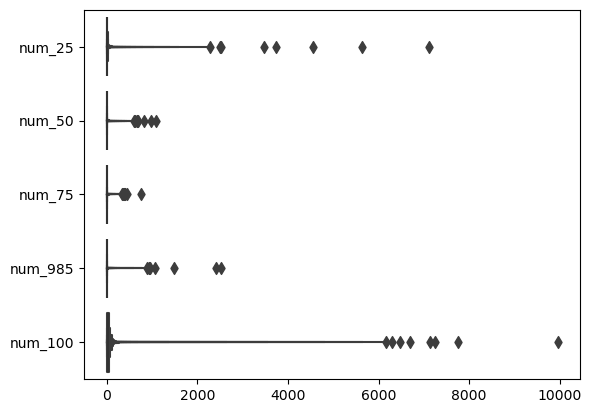

In [23]:
sns.boxenplot(data=userlog_df[cols] ,orient='h')

<AxesSubplot: >

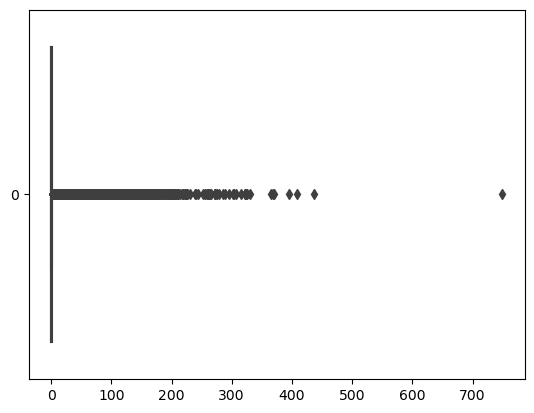

In [36]:
sns.boxplot(data=userlog_df['num_75'] ,orient='h')

- 일반적인 유저의 데이터를 사용하여 total_secs의 이상치를 추정하기 위해서 1~3분위수 사이의 데이터만 필터링하기로 결정

In [41]:
userlog_df.describe()

,msno_num,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,2.981212e+07,2.981212e+07,2.981212e+07,2.981212e+07,2.981212e+07,2.981212e+07,2.981212e+07,2.981212e+07
mean,3.680169e+06,6.558747e+00,1.631598e+00,1.018966e+00,1.132481e+00,3.072097e+01,3.024115e+01,-1.242483e+12
std,2.123276e+06,1.398458e+01,4.222357e+00,2.136779e+00,2.827002e+00,4.113349e+01,3.352548e+01,1.071502e+14
min,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,1.849810e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.970852e+03
50%,3.680100e+06,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.690526e+03
75%,5.507267e+06,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.024499e+04
max,7.376739e+06,7.104000e+03,1.088000e+03,7.490000e+02,2.516000e+03,9.958000e+03,2.798000e+03,9.223372e+15


In [28]:
userlog_filter1 = (userlog_df['total_secs'] <= 86400)
userlog_filter2 = (userlog_df['total_secs'] > 0)
userlog_filter3 = ((userlog_df['num_25'] > 0) &
                              (userlog_df['num_50'] > 0) &
                              (userlog_df['num_75'] > 0) &
                              (userlog_df['num_985'] > 0) &
                              (userlog_df['num_100'] > 7)
                              )
userlog_filter4 = ((userlog_df['num_25'] < 7) &
                              (userlog_df['num_50'] < 2) &
                              (userlog_df['num_75'] < 1) &
                              (userlog_df['num_985'] <1) &
                              (userlog_df['num_100'] < 38)
                              )

- 그러나 해당 조건에 모두 맞는 사람은 없었음...
- 유저의 사용 패턴이 제각각 너무 달라서 그런 것이라고 생각

In [8]:
userlog_df[userlog_filter1&userlog_filter2&userlog_filter3&userlog_filter4]

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs


In [ ]:
userlog_df[]

In [33]:
userlog_df[userlog_df['num_100'] > 480]

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
19235,1168863,2016-12-08,84,20,19,27,1532,158,409138.154
19324,1168863,2016-09-01,24,6,3,5,488,83,128319.363
21598,1380401,2015-07-18,6,2,2,5,610,211,145010.322
25958,1522029,2017-01-09,2,0,0,2,1764,519,394385.919
26057,1522029,2015-07-03,1,0,1,0,526,130,129401.869
...,...,...,...,...,...,...,...,...,...
29632474,6119484,2015-05-14,14,13,7,5,515,202,135680.189
29740334,4129278,2016-02-08,51,4,7,6,529,302,139760.441
29742945,4174818,2016-12-16,8,3,0,1,509,303,121890.902
29742979,4174818,2016-12-08,9,12,6,3,658,431,163876.021


<AxesSubplot: >

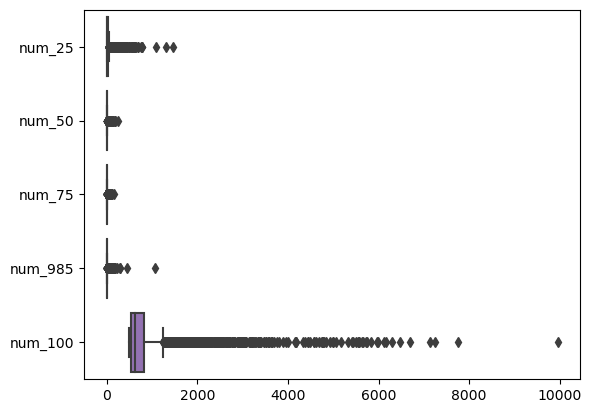

In [35]:
sns.boxplot(data=userlog_df[userlog_df['num_100'] > 480][cols] ,orient='h')

<AxesSubplot: >

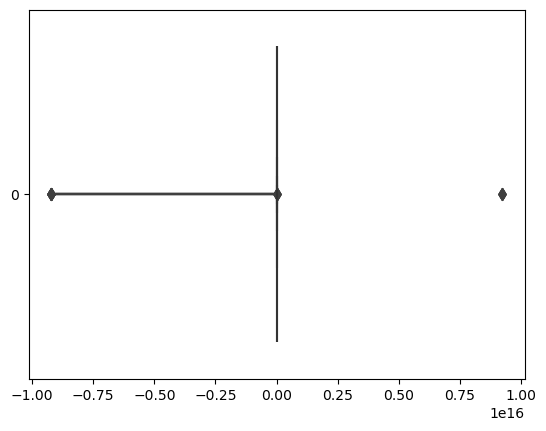

In [24]:
sns.boxenplot(data=userlog_df['total_secs'] ,orient='h')

In [25]:
userlog_df[userlog_df['total_secs'] < 0]

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
13794,697708,2015-07-17,13,1,4,4,74,40,-9.223372e+15
15320,796953,2015-07-12,6,0,0,0,105,104,-9.223372e+15
15327,796953,2015-07-14,2,0,0,1,15,16,-9.223372e+15
35466,1927276,2015-09-01,4,2,2,5,17,30,-9.223372e+15
35830,1927276,2015-08-07,1,2,1,4,52,57,-9.223372e+15
...,...,...,...,...,...,...,...,...,...
29748460,4392079,2015-09-30,2,0,0,0,51,52,-9.223372e+15
29790724,6460491,2015-06-28,4,0,1,0,45,47,-9.223372e+15
29791059,6460491,2015-06-01,1,0,0,1,18,19,-9.223372e+15
29791174,6460491,2015-06-09,4,1,3,0,46,51,-9.223372e+15


In [29]:
userlog_filtered = userlog_df[userlog_filter1 & userlog_filter2]

- 선형적인 모습이 보이는지 확인하기 위해서 시각화를 진행했으나, 선형적인 데이터 분포는 아니었음

<AxesSubplot: ylabel='total_secs'>

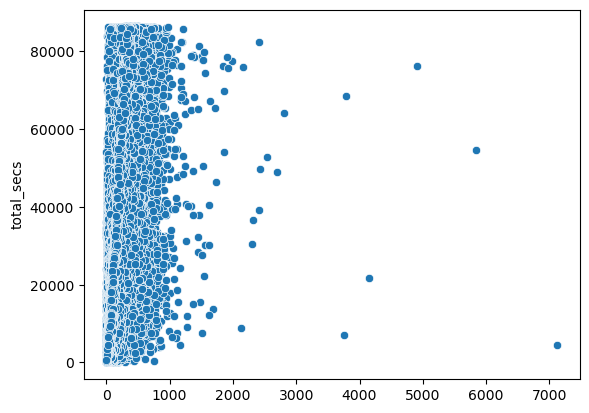

In [31]:
sns.scatterplot(data=userlog_filtered, 
                x=(userlog_filtered['num_25']+userlog_filtered['num_50']+userlog_filtered['num_75']+userlog_filtered['num_985']+userlog_filtered['num_100']),
                y=userlog_filtered['total_secs'])

<AxesSubplot: xlabel='num_100', ylabel='total_secs'>

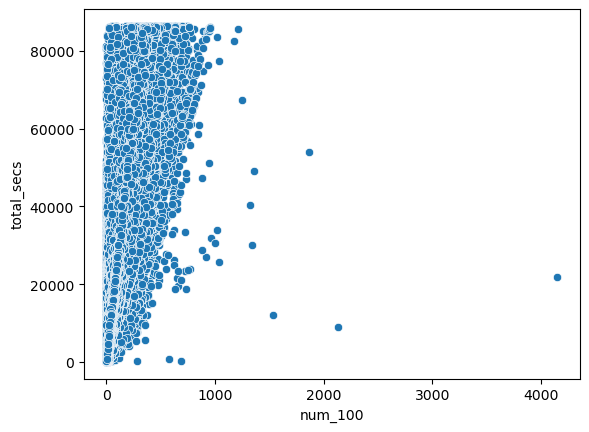

In [32]:
sns.scatterplot(data=userlog_filtered, 
                x=userlog_filtered['num_100'],
                y=userlog_filtered['total_secs'])

In [11]:
userlog_df[(userlog_df['msno_num'] == 1168863) & (userlog_df['total_secs'] > 86400)].sort_values('date')

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
19324,1168863,2016-09-01,24,6,3,5,488,83,128319.363
19235,1168863,2016-12-08,84,20,19,27,1532,158,409138.154


In [17]:
userlog_df[(userlog_df['msno_num'] == 1168863) & (userlog_df['date'] >= '2016-12-08	')].sort_values('date')

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
19235,1168863,2016-12-08,84,20,19,27,1532,158,409138.154
19242,1168863,2016-12-09,8,3,3,4,58,51,16357.139
19249,1168863,2016-12-10,2,0,1,2,91,84,22154.288
19256,1168863,2016-12-11,1,1,0,0,30,30,7299.008
19263,1168863,2016-12-12,1,1,0,3,15,16,4718.683
...,...,...,...,...,...,...,...,...,...
19346,1168863,2017-03-27,9,2,1,4,40,40,10849.741
19350,1168863,2017-03-28,9,1,2,5,61,55,17333.113
19329,1168863,2017-03-29,4,2,0,2,72,50,18149.720
19338,1168863,2017-03-30,2,1,0,4,52,45,13763.908


- PCA TEST 1 극단치에 있는 유저 로그를 골라냄

In [5]:
userlog_df.columns[2:9]

Index(['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs'],
      dtype='object')

In [34]:
cols = userlog_df.columns[2:9]

In [7]:
df_targ = userlog_df[cols]

In [8]:
scaler = MinMaxScaler()
df_targ_scaled = scaler.fit_transform(df_targ)

In [17]:
pca = PCA(n_components=2)
user_log_pca = pca.fit_transform(df_targ_scaled)

In [19]:
df_user_log_pca=pd.DataFrame(user_log_pca, columns=['pca_x', 'pca_y'])

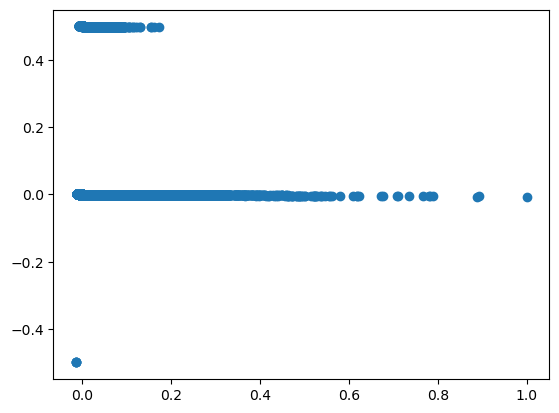

In [21]:
plt.scatter(x=df_user_log_pca['pca_x'], y=df_user_log_pca['pca_y'])

In [23]:
userlog_df['pca_x'] = df_user_log_pca['pca_x']
userlog_df['pca_y'] = df_user_log_pca['pca_y']

In [25]:
userlog_df[userlog_df['pca_y'] > 0.2].index

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,cluster,pca_x,pca_y
13794,697708,2015-07-17,13,1,4,4,74,40,-9.223372e+15,4,0.008075,0.499887
15320,796953,2015-07-12,6,0,0,0,105,104,-9.223372e+15,4,0.029902,0.499747
15327,796953,2015-07-14,2,0,0,1,15,16,-9.223372e+15,4,-0.002339,0.499959
35466,1927276,2015-09-01,4,2,2,5,17,30,-9.223372e+15,4,0.003019,0.499924
35830,1927276,2015-08-07,1,2,1,4,52,57,-9.223372e+15,4,0.012920,0.499859
...,...,...,...,...,...,...,...,...,...,...,...,...
29748460,4392079,2015-09-30,2,0,0,0,51,52,-9.223372e+15,4,0.010805,0.499872
29790724,6460491,2015-06-28,4,0,1,0,45,47,-9.223372e+15,4,0.009098,0.499884
29791059,6460491,2015-06-01,1,0,0,1,18,19,-9.223372e+15,4,-0.001253,0.499951
29791174,6460491,2015-06-09,4,1,3,0,46,51,-9.223372e+15,4,0.010846,0.499873


In [26]:
userlog_df[userlog_df['pca_y'] < -0.2]

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,cluster,pca_x,pca_y
4161943,6592924,2015-06-28,0,0,0,0,1,1,9.223372e+15,0,-0.014368,-0.499984
6207701,5678277,2015-08-13,0,0,0,0,1,1,9.223372e+15,0,-0.014368,-0.499984
24166098,5122385,2015-05-25,0,0,0,0,3,1,9.223372e+15,0,-0.014318,-0.499984
27438485,2199597,2015-05-04,0,0,0,0,1,1,9.223372e+15,0,-0.014368,-0.499984


- PCA TEST2. total_secs가 0~86400인 경우만 필터링하여 다시 PCA

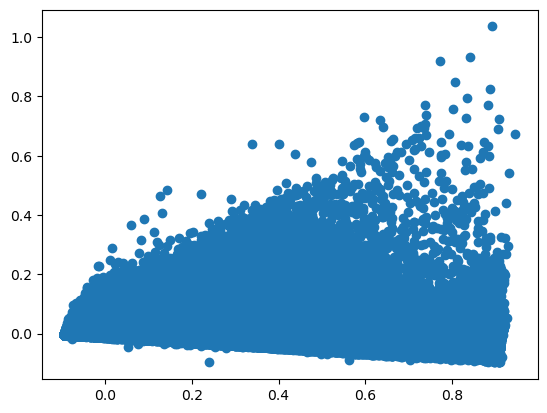

In [44]:
userlog_filtered = userlog_df[userlog_filter1 & userlog_filter2]

userlog_filtered = userlog_filtered[cols]

userlog_filtered_scaled = scaler.fit_transform(userlog_filtered)


pca2 = PCA(n_components=2)
user_log_filtered_pca = pca2.fit_transform(userlog_filtered_scaled)

df_user_log_filtered_pca=pd.DataFrame(user_log_filtered_pca, columns=['pca_x', 'pca_y'])

plt.scatter(x=df_user_log_filtered_pca['pca_x'], y=df_user_log_filtered_pca['pca_y'])

In [36]:
userlog_filtered['pca_y'] = df_user_log_filtered_pca['pca_y']

C:\Users\jiho\AppData\Local\Temp\ipykernel_21336\1175758428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userlog_filtered['pca_y'] = df_user_log_filtered_pca['pca_y']


In [45]:
df_user_log_filtered_pca

,pca_x,pca_y
0,-0.032912,-0.001846
1,-0.038993,-0.002628
2,-0.042618,0.007989
3,-0.083122,-0.003400
4,-0.020534,-0.002801
...,...,...
29798554,-0.082686,-0.004581
29798555,-0.071387,-0.002949
29798556,-0.055193,-0.004277
29798557,-0.086654,-0.003963


In [47]:
userlog_filtered['pca_x'] = df_user_log_filtered_pca['pca_x']
userlog_filtered['pca_y'] = df_user_log_filtered_pca['pca_y']

In [48]:
df_user_log_filtered_pca

,pca_x,pca_y
0,-0.032912,-0.001846
1,-0.038993,-0.002628
2,-0.042618,0.007989
3,-0.083122,-0.003400
4,-0.020534,-0.002801
...,...,...
29798554,-0.082686,-0.004581
29798555,-0.071387,-0.002949
29798556,-0.055193,-0.004277
29798557,-0.086654,-0.003963


In [52]:
params = {'n_clusters' : [2,3,4,5,6,7]}

grid_kmeans = GridSearchCV(KMeans(), param_grid=params, verbose=2)

grid_kmeans.fit(df_user_log_filtered_pca)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=2; total time=  55.1s


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=2; total time=  51.7s


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=2; total time=  51.3s


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=2; total time=  54.6s


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=2; total time=  49.6s


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=3; total time= 1.5min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=3; total time= 1.5min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=3; total time= 1.4min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=3; total time= 1.3min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=3; total time= 1.4min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=4; total time= 1.9min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=4; total time= 2.1min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=4; total time= 2.1min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=4; total time= 2.4min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=4; total time= 2.0min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=5; total time= 2.8min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=5; total time= 2.9min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=5; total time= 3.0min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=5; total time= 2.6min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=5; total time= 3.2min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=6; total time= 3.0min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=6; total time= 3.5min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=6; total time= 2.8min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=6; total time= 2.9min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=6; total time= 3.4min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=7; total time= 3.6min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=7; total time= 2.7min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=7; total time= 3.5min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=7; total time= 3.0min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[CV] END .......................................n_clusters=7; total time= 2.9min


c:\Users\jiho\anaconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GridSearchCV(estimator=KMeans(), param_grid={'n_clusters': [2, 3, 4, 5, 6, 7]},
             verbose=2)

In [54]:
best_kmeans = grid_kmeans.best_estimator_

In [56]:
df_user_log_filtered_pca['cluster'] = best_kmeans.predict(df_user_log_filtered_pca)

In [67]:
grid_kmeans.cv_results_['params']

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 6},
 {'n_clusters': 7}]

In [81]:
import joblib

joblib.dump(grid_kmeans, 'grid_kmeans.joblib')

['grid_kmeans.joblib']

In [58]:
df_user_log_filtered_pca.groupby('cluster').count()

,pca_x,pca_y
cluster,,
0,7868476,7868476
1,2334672,2334672
2,740635,740635
3,1446133,1446133
4,12956377,12956377
5,120915,120915
6,4331351,4331351


In [12]:
userlog_df['cluster'] = kmeans_model.predict(df_targ_scaled)

In [13]:
userlog_df

,msno_num,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,cluster
0,3609,2015-02-19,0,1,0,0,21,22,5263.376,0
1,3609,2015-05-06,4,0,0,0,19,20,4745.286,0
2,3609,2015-07-12,12,5,2,2,11,31,4389.907,1
3,3609,2015-09-08,1,0,0,0,4,5,978.743,0
4,3609,2015-11-15,0,0,0,0,27,25,6322.493,0
...,...,...,...,...,...,...,...,...,...,...
29812112,7374450,2017-03-01,1,0,0,0,4,1,1030.690,0
29812113,7374450,2017-03-02,0,1,1,0,7,2,2001.529,0
29812114,7374450,2017-03-15,0,1,1,0,13,2,3402.203,0
29812115,7374450,2017-03-10,0,0,0,1,2,2,684.929,0


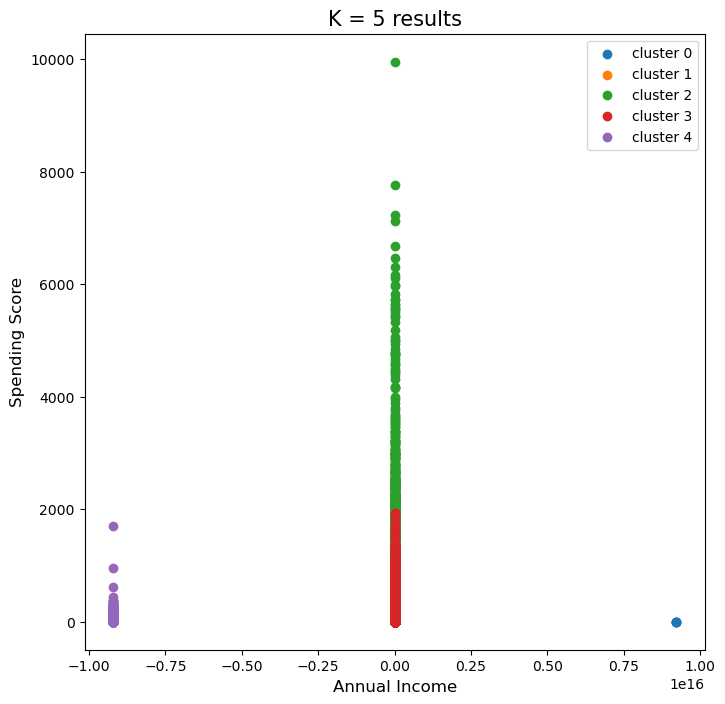

In [14]:
plt.figure(figsize = (8, 8))

k = 5
for i in range(k):
    plt.scatter(userlog_df.loc[userlog_df['cluster'] == i, 'total_secs'], userlog_df.loc[userlog_df['cluster'] == i, 'num_100'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()